# Fuzzy C-Means Clustering

Similar to K-Means, Fuzzy C-Means organises items into groups based on a similarity criteria. However, unlike K-Means, each item may belong to more than one group (hence the word fuzzy), where the degree of membership for each item is given by a probability distribution over the clusters.

The goal of this algorithm is to minimize the objective function $J$ in each iteration. Here $N$ is the number of data points, $C$ is the number of clusters required, $c_j$ is the centre vector for cluster $j$, and $\delta_{ij}$ is the degree of membership for the $i$th data point $x_i$ in cluster $j$. The norm,  $\Vert x_i - c_j \Vert$ is the standard Euclidian distance metric $ \sqrt{(x_{i,1} - c_{j,1})^2 + (x_{i,2} - c_{j,2})^2 + \cdots} $.

$$ J = \sum_{i=1}^N \sum_{j=1}^C \delta_{ij} \Vert x_i - c_j \Vert ^2 $$

Note that, in each iteration, the algorithm maintains a centre vector $c_j$ for each of the clusters. These centres are calculated as the weighted average of the data-points, where the weights are given by the degrees of membership. $m$ is the fuzziness coefficient which determines the amount of overlap between clusters. A higher value of $m$ implies greater overlap. The degree of membership $\delta{ij}$ and the centres $c_j$ are calculated as follows:

$$ \delta{ij} = \frac{1}{ \sum_{k=1}^{C} \left(\left\Vert \frac{x_i - c_j}{x_i - c_k} \right\Vert\right)^{\frac{2}{m-1}} }   $$

$$ c_j = \frac{ \sum_{i=1}^{N} \delta_{ij}^m \cdot x_i }{ \sum_{i=1}^{N} \delta_{ij}^m }  $$

At the start of the algorithm, the degree of membership for data point $i$ to cluster $j$ is initialised
with a random value $\theta_{ij}$ , 0 $\leq$ $\theta_{ij}$ $\leq$ 1, such that $ \sum_{j}^C \delta_{ij} = 1 $


Convince yourself that you did something similar in K-Means, although implicitly. As an analogy, replace $C$ with $K$, and $\delta_{ij}$ with 1 or 0 depending on whether a given data point $x_i$ belongs to cluster $j$. You will soon realize that minimizing $J$ is nothing but updating the clusters $c_j$ with the mean of their corresponding data points.

All the math may seem to be complicated, but you should be able to cope up with a bit of practice. We'll use the same accelerometer dataset from the previous notebook and try to cluster using Fuzzy C-Means.

In [1]:
# Customary Imports
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
# A thing of beauty is a joy forever
import seaborn as sns
sns.set()
sns.set_palette("husl")

Let's start with the algorithm. We'll first set some constants and load the data points.

In [2]:
C = 4 # We need 4 clusters
m = 2 # This is arbitrary
data = np.load('data/acc.npy')

Next, let's assign membership values to each data point. Keep in mind that for every data point, the memberships should add up to 1.  
Complete the function below

## Task 1

In [3]:
def initialize_memberships(data, C):
    """Returns an NxC array of randomly assigned memberships."""
    N, _ = data.shape
    # Create a random array of shape (N, C)
    mems = np.random.random((N, C))   
    # Divide by the sum along axis 1 so that the numbers sum up to 1
    return mems / mems.sum(axis=1, keepdims=True)

Once we have the initial memberships, we update the centres. Complete the function below

## Task 2

In [4]:
def update_centres(data, memberships, m):
    """Returns new centres from given data points and memberships."""
    # Notice the equation for cj.
    # Isn't that plain old matrix multiplication?
    mems = memberships ** m
    # We first calculate  δij^m / ∑ δij^m as weights
    weights = mems / mems.sum(axis=0)
    # And then do the matrix multiplication
    return np.dot(weights.T, data)

As in K-Means, we would need to calculate distances from each centre. Complete the function below.

## Task 3

In [5]:
def get_distances(data, centres):
    """Returns distances between each point and every centre."""
    # Remember Life without Loops? Let's build upon it.
    # Please read through the numpy docs on broadcasting,
    # particularly the last example about outer addition
    # https://docs.scipy.org/doc/numpy-1.13.0/user/basics.broadcasting.html
    return np.sqrt(((data[:, None] - centres)**2).sum(axis=2)) 

You can now make good use of `get_distances` to finally calculate the updated memberships. Complete the function below. 

## Task 4

In [6]:
def update_memberships(data, centres, m):
    """Update the memberships according to new centres."""
    # You might have got it by now. Broadcasting rocks!
    dist = get_distances(data, centres)
    dist = dist[:, None, :] / dist[:, :, None]
    dist = dist ** (2/(m-1))
    return 1/dist.sum(axis=1)

Now that all's set, the only thing left is the termination criteria. Complete the function below.

## Task 5

In [7]:
def fcmeans(data, C, m):
    """The Fuzzy C-Means algorithm."""
    memberships = initialize_memberships(data, C)
    initial_centres = update_centres(data, memberships, m)
    old_memberships = np.zeros_like(memberships)
    while not np.allclose(memberships, old_memberships):
        old_memberships = memberships
        centres = update_centres(data, memberships, m)
        memberships = update_memberships(data, centres, m)
    return memberships, centres, initial_centres

## Showtime

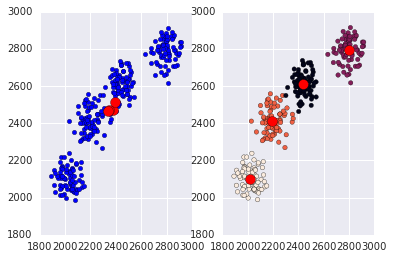

In [8]:
C = 4
m = 2
data = np.load('data/acc.npy')

memberships, centres, initial_centres = fcmeans(data, C, m)

plt.subplot(121)
plt.scatter(data[:, 0], data[:, 1])
plt.scatter(initial_centres[:, 0], initial_centres[:, 1], c='r', s=100)
plt.subplot(122)
plt.scatter(data[:, 0], data[:, 1], c=memberships.argmax(axis=1))
plt.scatter(centres[:, 0], centres[:, 1], c='r', s=100)
plt.show()

Try running the cell above multiple times. Do you notice that the clusters are perfect everytime? Does K-Means show the same results? everytime?